## This notebook is used to plot data produced by forward simulating the suspected progenitor of NGC 300 X-1 using MESA (Modules for Experiments in Stellar) Astrophysics). It is meant to track certain characteristics of the system as a function of time. We want to figure out what type of progenitor system could create the current system NGC 300 X-1 has.

In [ ]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

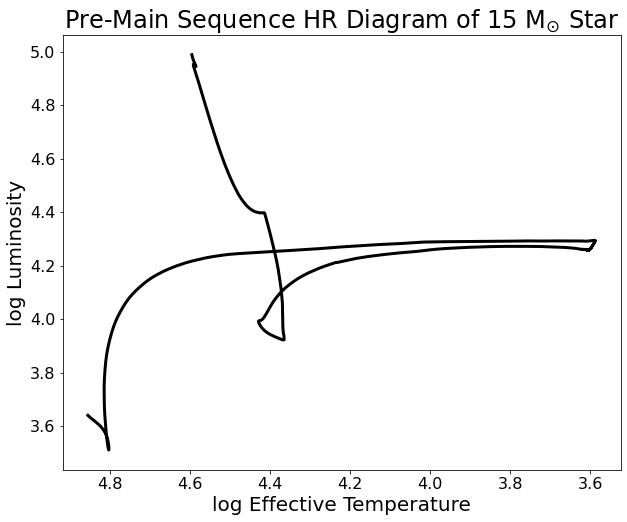

In [3]:
h = mr.MesaData('history_best.data')
plt.figure(figsize=(10,8))
plt.plot(h.log_Teff,h.log_L,lw=3,color='black')
plt.xlabel('log Effective Temperature',fontsize=20)
plt.ylabel('log Luminosity',fontsize=20)
plt.title('Pre-Main Sequence HR Diagram of 15 M$_{\odot}$ Star',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_xaxis()

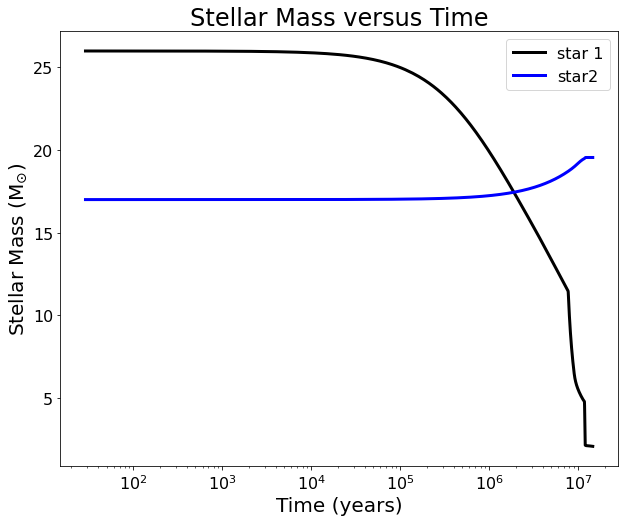

In [5]:
h = mr.MesaData('history_best.data')
plt.figure(figsize=(10,8))
plt.plot(h.age,h.star_1_mass,lw=3,color='black',label='star 1')
plt.plot(h.age,h.star_2_mass,lw=3,color='blue',label='star2')
plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel('Time (years)',fontsize=20)
plt.ylabel('Stellar Mass (M$_{\odot}$)',fontsize=20)
plt.title('Stellar Mass versus Time',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('MassvTime_best.png')

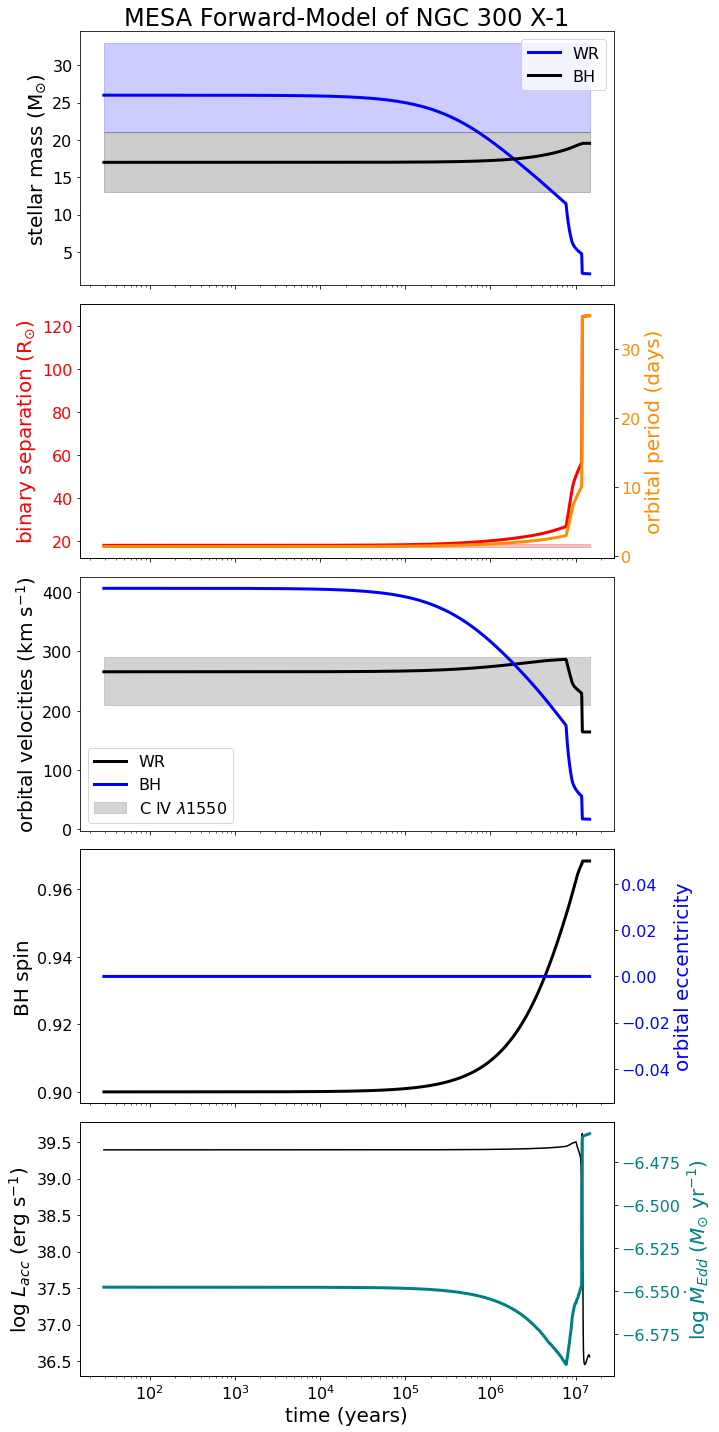

In [60]:
#h = mr.MesaData('BSEmodel1/binary_history.data')

h = mr.MesaData('history_best.data')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(10,20),sharex=True)
WRcolor = "blue"
BHcolor = "black"

# Panel 1: stellar mass evolution
ax1.plot(h.age,h.star_1_mass,lw=3,color=WRcolor,label='WR')
ax1.plot(h.age,h.star_2_mass,lw=3,color=BHcolor,label='BH')
ax1.fill_between([np.min(h.age),np.max(h.age)],[21,21],[33,33],color=WRcolor,alpha=0.2)
ax1.fill_between([np.min(h.age),np.max(h.age)],[13,13],[21,21],color=BHcolor,alpha=0.2)
ax1.set_xscale('log')
ax1.legend(fontsize=16)
ax1.set_ylabel('stellar mass (M$_{\odot}$)',fontsize=20)
ax1.set_title('MESA Forward-Model of NGC 300 X-1',fontsize=24)
ax1.tick_params(labelsize=16)

# Panel 2: Binary separation and orbital period evolution
ax2.plot(h.age,h.binary_separation,lw=3,color='red')
ax2.fill_between([np.min(h.age),np.max(h.age)],[17.6,17.6],[18.7,18.7],color='lightcoral',alpha=0.5)
ax2.set_ylabel('binary separation (R$_{\odot}$)',fontsize=20,color="red")
ax2.tick_params(labelsize=16,labelcolor="red")

ax2t = ax2.twinx()  
ax2t.plot(h.age,h.period_days,lw=3,color='darkorange')
ax2t.set_ylabel('orbital period (days)', color="darkorange",fontsize=20)  
ax2t.tick_params(labelsize=16,axis='y', labelcolor="darkorange")


# Panel 3: Roche lobe overflow of the donor star
ax3.plot(h.age,h.v_orb_1,lw=3,color='black',label='WR')
ax3.plot(h.age,h.v_orb_2,lw=3,color='blue',label='BH')
ax3.fill_between([np.min(h.age),np.max(h.age)],[210,210],[290,290],color='darkgrey',alpha=0.5,label='C IV $\lambda$1550')
ax3.legend(fontsize=16)
ax3.tick_params(labelsize=16)
ax3.set_ylabel('orbital velocities (km s$^{-1}$)',fontsize=20)


# Panel 4: Orbital eccentricity and BH spin
ax4.plot(h.age,h.bh_spin,lw=3,color=BHcolor)
ax4.tick_params(labelsize=16,labelcolor=BHcolor)
ax4.set_ylabel('BH spin',fontsize=20,color=BHcolor)

ax4t = ax4.twinx()  
ax4t.plot(h.age,h.eccentricity,lw=3,color=WRcolor)
ax4t.tick_params(labelsize=16,labelcolor=WRcolor)
ax4t.set_ylabel('orbital eccentricity',fontsize=20,color=WRcolor)

# Panel 5: Accretion luminosity and Eddington rate
ax5.plot(h.age,h.lg_accretion_luminosity+np.ones(len(h.lg_accretion_luminosity))*33.58,color='k',label='accretion luminosity')

ax5t = ax5.twinx()  #
ax5t.plot(h.age,h.lg_mdot_edd,lw=3,color='teal',label='Eddington accretion rate')
ax5.tick_params(labelsize=16)
ax5.set_ylabel('log $L_{acc}$ (erg s$^{-1}$)',fontsize=20)
ax5t.set_ylabel('log $\.{M}_{Edd}$ ($M_{\odot}$ yr$^{-1}$)', color="teal",fontsize=20)  
ax5t.tick_params(labelsize=16,axis='y', labelcolor="teal")
ax5.set_xlabel('time (years)',fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
plt.savefig('model_best.jpg',bbox_inches='tight')

133.0599005741733
34.80811603879208


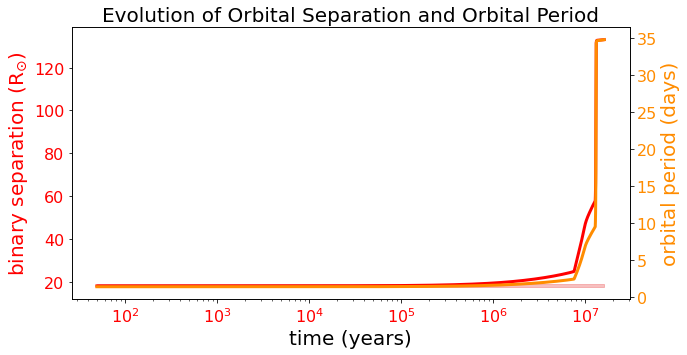

In [24]:
# Panel 2: Binary separation and orbital period evolution
h = mr.MesaData('history_LH.data')

WRcolor = "blue"
BHcolor = "black"

fig, (ax) = plt.subplots(1,figsize=(10,5),sharex=True)

# Panel 2: Binary separation and orbital period evolution
ax.plot(h.age,h.binary_separation,lw=3,color='red')
ax.set_xscale('log')
ax.fill_between([np.min(h.age),np.max(h.age)],[17.6,17.6],[18.7,18.7],color='lightcoral',alpha=0.5)
ax.set_ylabel('binary separation (R$_{\odot}$)',fontsize=20,color="red")
ax.tick_params(labelsize=16,labelcolor="red")

axt = ax.twinx()  
axt.plot(h.age,h.period_days,lw=3,color='darkorange')
ax.set_title('Evolution of Orbital Separation and Orbital Period',fontsize=20)
axt.set_ylabel('orbital period (days)', color="darkorange",fontsize=20) 
ax.set_xlabel('time (years)',fontsize=20)
axt.tick_params(labelsize=16,axis='y', labelcolor="darkorange")
#plt.savefig('sep_LH.jpg')
print(h.binary_separation[-1])
print(h.period_days[-1])

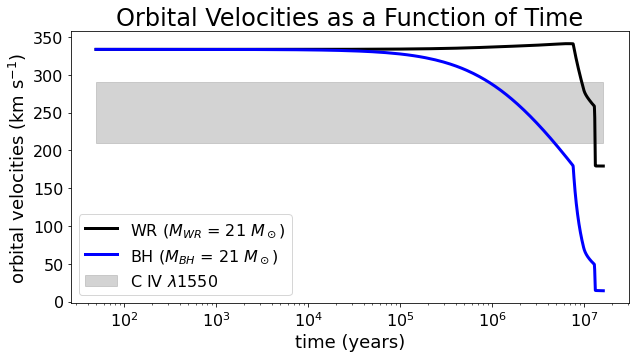

In [52]:
# Panel 3: Roche lobe overflow of the donor star
h = mr.MesaData('history_LH.data')

WRcolor = "blue"
BHcolor = "black"
fig, (ax) = plt.subplots(1,figsize=(10,5),sharex=True)
ax.set_xscale('log')
ax.plot(h.age,h.v_orb_1,lw=3,color='black',label='WR ($M_{WR}$ = 21 $M_\odot$)')
ax.plot(h.age,h.v_orb_2,lw=3,color='blue',label='BH ($M_{BH}$ = 21 $M_\odot$)')

ax.set_title('Orbital Velocities as a Function of Time',fontsize=24)
ax.fill_between([np.min(h.age),np.max(h.age)],[210,210],[290,290],color='darkgrey',alpha=0.5,label='C IV $\lambda$1550')
ax.legend(fontsize=16)
ax.tick_params(labelsize=16)

ax.set_ylabel('orbital velocities (km s$^{-1}$)',fontsize=18)
ax.set_xlabel('time (years)',fontsize=18)

plt.savefig('orbital_vel_LH.jpg',bbox_inches='tight')

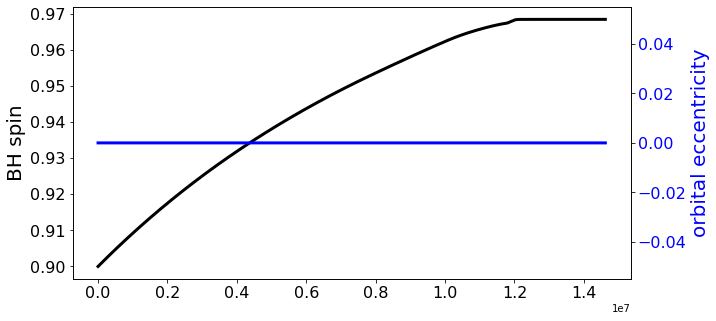

In [29]:
# Panel 4: Orbital eccentricity and BH spin

h = mr.MesaData('history_best.data')

WRcolor = "blue"
BHcolor = "black"
fig, (ax4) = plt.subplots(1,figsize=(10,5),sharex=True)

ax4.plot(h.age,h.bh_spin,lw=3,color=BHcolor)
ax4.tick_params(labelsize=16,labelcolor=BHcolor)
ax4.set_ylabel('BH spin',fontsize=20,color=BHcolor)

ax4t = ax4.twinx()  
ax4t.plot(h.age,h.eccentricity,lw=3,color=WRcolor)
ax4t.tick_params(labelsize=16,labelcolor=WRcolor)
ax4t.set_ylabel('orbital eccentricity',fontsize=20,color=WRcolor)
plt.savefig('bh_spin_best.png')

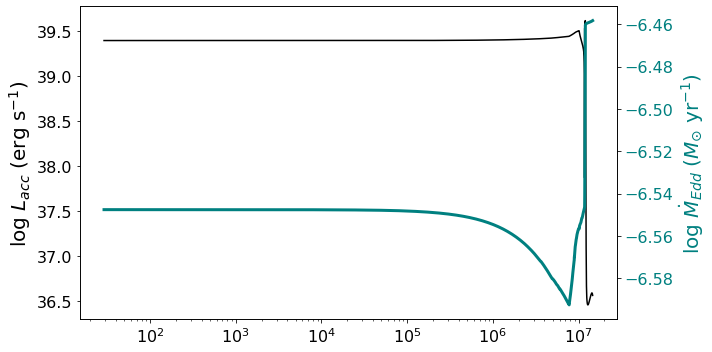

In [20]:
# Panel 5: Accretion luminosity and Eddington rate
h = mr.MesaData('history_best.data')

WRcolor = "blue"
BHcolor = "black"
fig, (ax5) = plt.subplots(1,figsize=(10,5),sharex=True)

ax5.plot(h.age,h.lg_accretion_luminosity+np.ones(len(h.lg_accretion_luminosity))*33.58,color='k',label='accretion luminosity')
ax5.set_xscale('log')
ax5t = ax5.twinx()  #
ax5t.plot(h.age,h.lg_mdot_edd,lw=3,color='teal',label='Eddington accretion rate')
ax5.tick_params(labelsize=16)
ax5.set_ylabel('log $L_{acc}$ (erg s$^{-1}$)',fontsize=20)
ax5t.set_ylabel('log $\.{M}_{Edd}$ ($M_{\odot}$ yr$^{-1}$)', color="teal",fontsize=20)  
ax5t.tick_params(labelsize=16,axis='y', labelcolor="teal")
plt.savefig('luminosity_best.png')
fig.tight_layout()

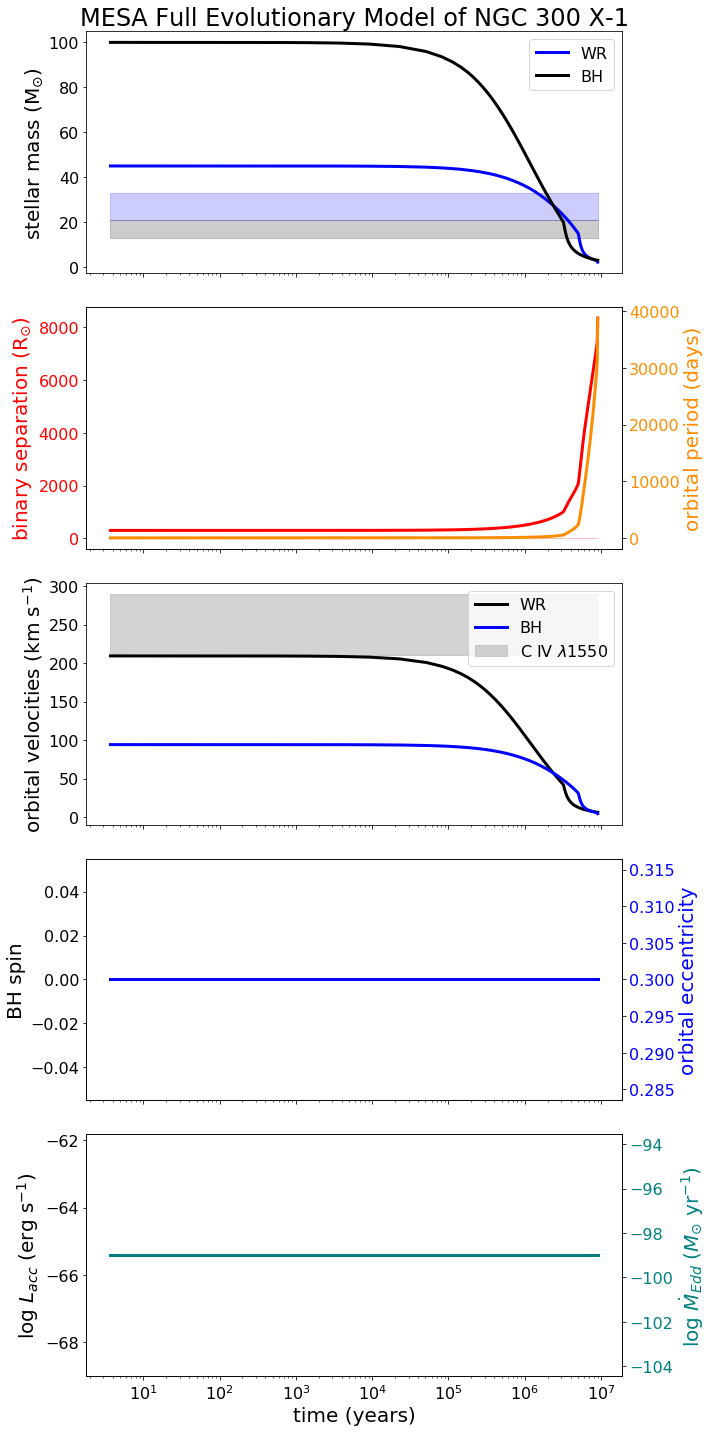

In [98]:
h = mr.MesaData('X1Evolution/binary_history.data')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(10,20),sharex=True)
WRcolor = "blue"
BHcolor = "black"

# Panel 1: stellar mass evolution
ax1.plot(h.age,h.star_1_mass,lw=3,color=WRcolor,label='WR')
ax1.plot(h.age,h.star_2_mass,lw=3,color=BHcolor,label='BH')
ax1.fill_between([np.min(h.age),np.max(h.age)],[21,21],[33,33],color=WRcolor,alpha=0.2)
ax1.fill_between([np.min(h.age),np.max(h.age)],[13,13],[21,21],color=BHcolor,alpha=0.2)
ax1.set_xscale('log')
ax1.legend(fontsize=16)
ax1.set_ylabel('stellar mass (M$_{\odot}$)',fontsize=20)
ax1.set_title('MESA Full Evolutionary Model of NGC 300 X-1',fontsize=24)
ax1.tick_params(labelsize=16)

# Panel 2: Binary separation and orbital period evolution
ax2.plot(h.age,h.binary_separation,lw=3,color='red')
ax2.fill_between([np.min(h.age),np.max(h.age)],[17.6,17.6],[18.7,18.7],color='lightcoral',alpha=0.5)
ax2.set_ylabel('binary separation (R$_{\odot}$)',fontsize=20,color="red")
ax2.tick_params(labelsize=16,labelcolor="red")

ax2t = ax2.twinx()  
ax2t.plot(h.age,h.period_days,lw=3,color='darkorange')
ax2t.set_ylabel('orbital period (days)', color="darkorange",fontsize=20)  
ax2t.tick_params(labelsize=16,axis='y', labelcolor="darkorange")

# Panel 3: Roche lobe overflow of the donor star
ax3.plot(h.age,h.v_orb_1,lw=3,color='black',label='WR')
ax3.plot(h.age,h.v_orb_2,lw=3,color='blue',label='BH')
ax3.fill_between([np.min(h.age),np.max(h.age)],[210,210],[290,290],color='darkgrey',alpha=0.5,label='C IV $\lambda$1550')
ax3.legend(fontsize=16)
ax3.tick_params(labelsize=16)
ax3.set_ylabel('orbital velocities (km s$^{-1}$)',fontsize=20)

# Panel 4: Orbital eccentricity and BH spin
ax4.plot(h.age,h.bh_spin,lw=3,color=BHcolor)
ax4.tick_params(labelsize=16,labelcolor=BHcolor)
ax4.set_ylabel('BH spin',fontsize=20,color=BHcolor)

ax4t = ax4.twinx()  
ax4t.plot(h.age,h.eccentricity,lw=3,color=WRcolor)
ax4t.tick_params(labelsize=16,labelcolor=WRcolor)
ax4t.set_ylabel('orbital eccentricity',fontsize=20,color=WRcolor)


# Panel 5: Accretion luminosity and Eddington rate
ax5.plot(h.age,h.lg_accretion_luminosity+np.ones(len(h.lg_accretion_luminosity))*33.58,color='k',label='accretion luminosity')

ax5t = ax5.twinx()  #
ax5t.plot(h.age,h.lg_mdot_edd,lw=3,color='teal',label='Eddington accretion rate')
ax5.tick_params(labelsize=16)
ax5.set_ylabel('log $L_{acc}$ (erg s$^{-1}$)',fontsize=20)
ax5t.set_ylabel('log $\.{M}_{Edd}$ ($M_{\odot}$ yr$^{-1}$)', color="teal",fontsize=20)  
ax5t.tick_params(labelsize=16,axis='y', labelcolor="teal")


ax5.set_xlabel('time (years)',fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout();

2.2253436947014698


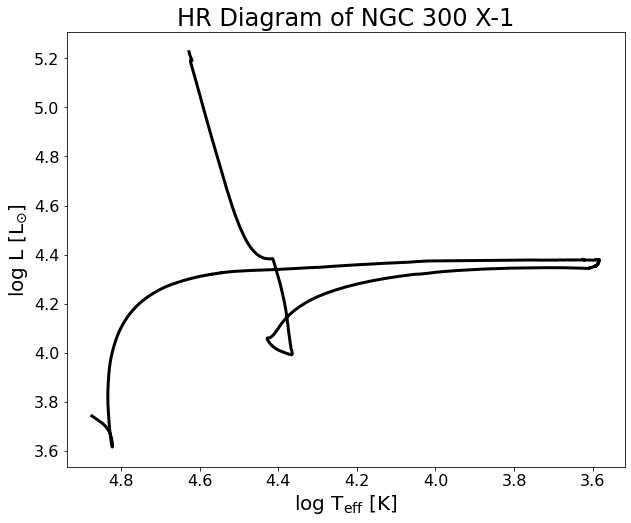

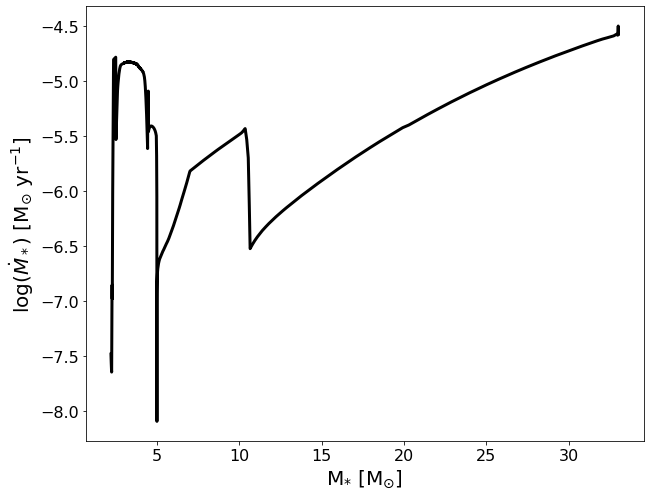

In [56]:
h = mr.MesaData('history_HL.data')
plt.figure(1,figsize=(10,8))
plt.plot(h.log_Teff,h.log_L,lw=3,color='black')
plt.xlabel(r'log T$_{\rm eff}$ [K]',fontsize=20)
plt.ylabel(r'log L [L$_{\odot}$]',fontsize=20)
plt.title('HR Diagram of NGC 300 X-1',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_xaxis()
#plt.savefig('HR_LH.png')

plt.figure(2,figsize=(10,8))
plt.plot(h.star_1_mass,h.lg_wind_mdot_1,lw=3,color='black')
plt.xlabel('M$_{*}$ [M$_{\odot}$]',fontsize=20)
plt.ylabel('log($\dot{M}_*$) [M$_{\odot}$ yr$^{-1}$]',fontsize=20)
#plt.title('HR Diagram of NGC 300 X-1',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.savefig('massrate_versus_mass_LH.png')

print(h.star_1_mass[-1])

[25.99968907 25.99928142 25.99891929 ...  2.05624877  2.05603572
  2.05584284]


MovieWriter imagemagick unavailable; using Pillow instead.


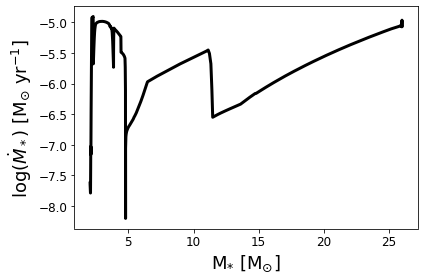

In [2]:
h = mr.MesaData('history_best.data')

fig, ax = plt.subplots()
line, = ax.plot(h.star_1_mass,h.lg_wind_mdot_1,lw=3,color='black')
ax.set_xlabel(r'M$_{*}$ [M$_{\odot}$]',fontsize=18)
ax.set_ylabel(r'log($\dot{M}_*$) [M$_{\odot}$ yr$^{-1}$]',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

def update(num, x, y, line):
    line.set_data(h.star_1_mass[:num], h.lg_wind_mdot_1[:num])
    return line,

x = h.star_1_mass
y = h.lg_wind_mdot_1
ani = animation.FuncAnimation(fig, update, len(h.lg_wind_mdot_1), fargs = [x, y, line],
                              interval=25, blit=False)
ani.save('WR_massloss_best.gif',writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


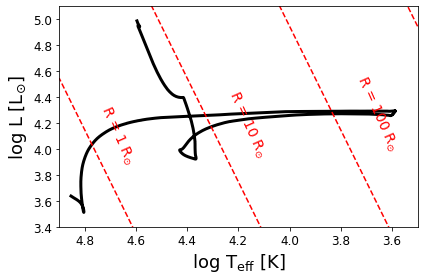

In [21]:
fig, ax = plt.subplots()
line, = ax.plot(h.log_Teff,h.log_L,lw=3,color='black')
ax.set_xlabel(r'log T$_{\rm eff}$ [K]',fontsize=18)
ax.set_ylabel(r'log L [L$_{\odot}$]',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# L = R**2 T**4; show lines of constant radius
Tmin = 3.5
Tmax = 4.9
Lmin = 3.4
Lmax = 5.1
logT = np.linspace(Tmin,Tmax,100)
logR = np.linspace(0,4,5)

for i in range(len(logR)):
    logL = 2*logR[i] + 4*np.log10(10**logT / 5800)
    plt.plot(logT,logL,'--r')

plt.text(4.75,3.9,r'R = 1 R$_{\odot}$',fontsize=14,color='red',rotation=-66)
plt.text(4.25,3.95,r'R = 10 R$_{\odot}$',fontsize=14,color='red',rotation=-66)
plt.text(3.75,4.0,r'R = 100 R$_{\odot}$',fontsize=14,color='red',rotation=-66)

def update(num, x, y, line):
    line.set_data(h.log_Teff[:num], h.log_L[:num])
    line.axes.axis([Tmax, Tmin, Lmin, Lmax])
    return line,

x = h.log_Teff
y = h.log_L
ani = animation.FuncAnimation(fig, update, len(h.log_L), fargs=[x, y, line],
                              interval=25, blit=False)
ani.save('HR_diagram_best.gif',writer='imagemagick', fps=60)